In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [48]:
N = norm.cdf

### Parameters

In [5]:
STRIKE_PRICE = 100
STOCK_PRICE0 = 110

VOLATILITY = 0.2
RISK_FREE_RATE = 0.1

T_TO_EXP = 1.5 # YEARS
 
N_MC_SIMULATIONS = 252
N_PATH = 100

In [6]:
def mc_pricing(S0, r, sigm, T, N, N_path):
    dt = T / N
    times = np.linspace(0, T, N+1)
    
    # Initialize array: rows = time steps, columns = paths
    S = np.zeros((N + 1, N_path))
    S[0] = S0  # initial value for all paths

    for t in range(1, N + 1):
        Z = np.random.normal(size=N_path)  # generate one z per path
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigm**2) * dt + sigm * np.sqrt(dt) * Z)
    
    return S

In [13]:
type(int(N_MC_SIMULATIONS * T_TO_EXP))

int

In [14]:
mc_prices = mc_pricing(STOCK_PRICE0, RISK_FREE_RATE, VOLATILITY, T_TO_EXP, int(N_MC_SIMULATIONS * T_TO_EXP), N_PATH)

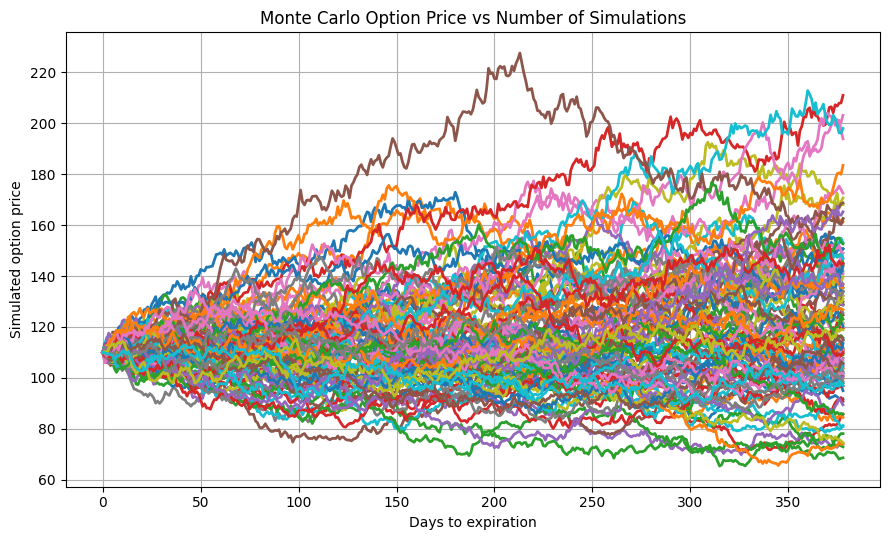

In [35]:
time_points = np.arange(mc_prices.shape[0])


plt.figure(figsize=(9, 5.5))

for i in range(mc_prices.shape[1]):
    plt.plot( time_points, mc_prices[:, i], lw=2.0)

plt.title("Monte Carlo Option Price vs Number of Simulations")
plt.xlabel("Days to expiration")
plt.ylabel("Simulated option price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
def call_option(K, S0, r, sigm, T):
    d1 =  (np.log(S0/K) + (r + (sigm**2) / 2)*T) / (sigm*np.sqrt(T))

    d2 = d1 - sigm*np.sqrt(T)

    p =  S0 * N(d1) - K * np.exp(-r*T) * N(d2)

    return p

In [39]:
mc_prices.shape

(379, 100)

In [44]:
mean_price = np.mean(mc_prices, axis = 0 )

In [43]:
# we take the average from each path to predict the stock price in this particular day

In [52]:
call_option(STRIKE_PRICE, mean_price, VOLATILITY, RISK_FREE_RATE, T_TO_EXP)

array([31.00045748, 74.63610173, 57.47229764, 26.01358323, 33.117619  ,
       31.60354636, 42.00311119, 24.92644909, 51.94124914, 50.95485641,
       67.19351057, 31.78216341, 47.69589687, 33.58003237, 13.58727496,
       16.10377056, 76.28331942, 37.35973762, 71.79734869, 19.15783342,
       28.58429432, 48.73785319, 25.01913298, 27.15838256, 31.97499274,
       32.34729515, 50.23094529, 46.87912643, 55.93626305, 41.48637964,
       56.13888342, 72.09045977, 11.5625274 , 88.79376735, 60.19322407,
       33.04386748, 77.06652744, 55.47036462, 27.48032285, 76.04476676,
       45.98716998, 41.58375615, 27.62753035, 20.56576284, 48.14193604,
       44.59865365, 54.81824598, 25.75565259, 51.39353726, 24.0514593 ,
       67.38703706, 65.87981563,  9.93365277, 21.63646451, 36.03406921,
       55.00125103, 58.03064367, 53.97427227, 45.03101181, 28.75020701,
       34.17023117, 30.30278626, 36.72026855, 38.35538608, 17.87770289,
       98.48519059, 36.63907745, 45.15067775, 46.0797258 , 37.43